In [1]:
%load_ext tensorboard
%tensorboard --logdir=/home/adong/hdrnet-pytorch/jho_logs/lightning_logs/version_1701084

Reusing TensorBoard on port 6006 (pid 10601), started 0:09:03 ago. (Use '!kill 10601' to kill it.)

# Import statements

In [16]:
import sys
sys.path.append('..')
from model_building import HDRPointwiseNN
from dataset import HDRDataset
import os
from PIL import Image
import math
import torch
from torchvision import transforms

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# Load some validation pictures

In [56]:
#image_path = '/home/adong/Downloads/carlos.png'
#image_path = '/home/adong/Downloads/Sreyas.jpg'
image_path = '/home/adong/Downloads/JeanPonce.jpg'

model_path = '/home/adong/hdrnet-pytorch/jho_logs/lightning_logs/version_1701084/checkpoints/epoch=25-step=1044.ckpt' 
hdrnet = HDRPointwiseNN()
with open(model_path,'rb') as f:
    checkpoint = torch.load(f, map_location=lambda storage, loc: storage)

hdrnet.load_state_dict(checkpoint['state_dict'])



<All keys matched successfully>

In [57]:
checkpoint.keys()


dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'callbacks', 'optimizer_states', 'lr_schedulers', 'state_dict'])

In [58]:
checkpoint['callbacks'].values()

dict_values([{'monitor': 'val_loss', 'best_model_score': tensor(0.0099), 'best_model_path': '/home/awd275/hdrnet-pytorch/jho_logs/lightning_logs/version_1701084/checkpoints/epoch=25-step=1044.ckpt', 'current_score': tensor(0.0099), 'dirpath': '/home/awd275/hdrnet-pytorch/jho_logs/lightning_logs/version_1701084/checkpoints'}])

In [59]:
reduced_transforms = transforms.Compose([
            transforms.Resize((256,256), Image.BICUBIC),
            transforms.ToTensor(),
        ])
full_transforms = transforms.ToTensor()


In [60]:
input_image = Image.open(image_path).convert('RGB')
input_image_reduced = reduced_transforms(input_image).unsqueeze(0)
input_image_full = full_transforms(input_image).unsqueeze(0)
pred = hdrnet.forward(input_image_reduced,input_image_full,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


NameError: name 'output_image_full' is not defined

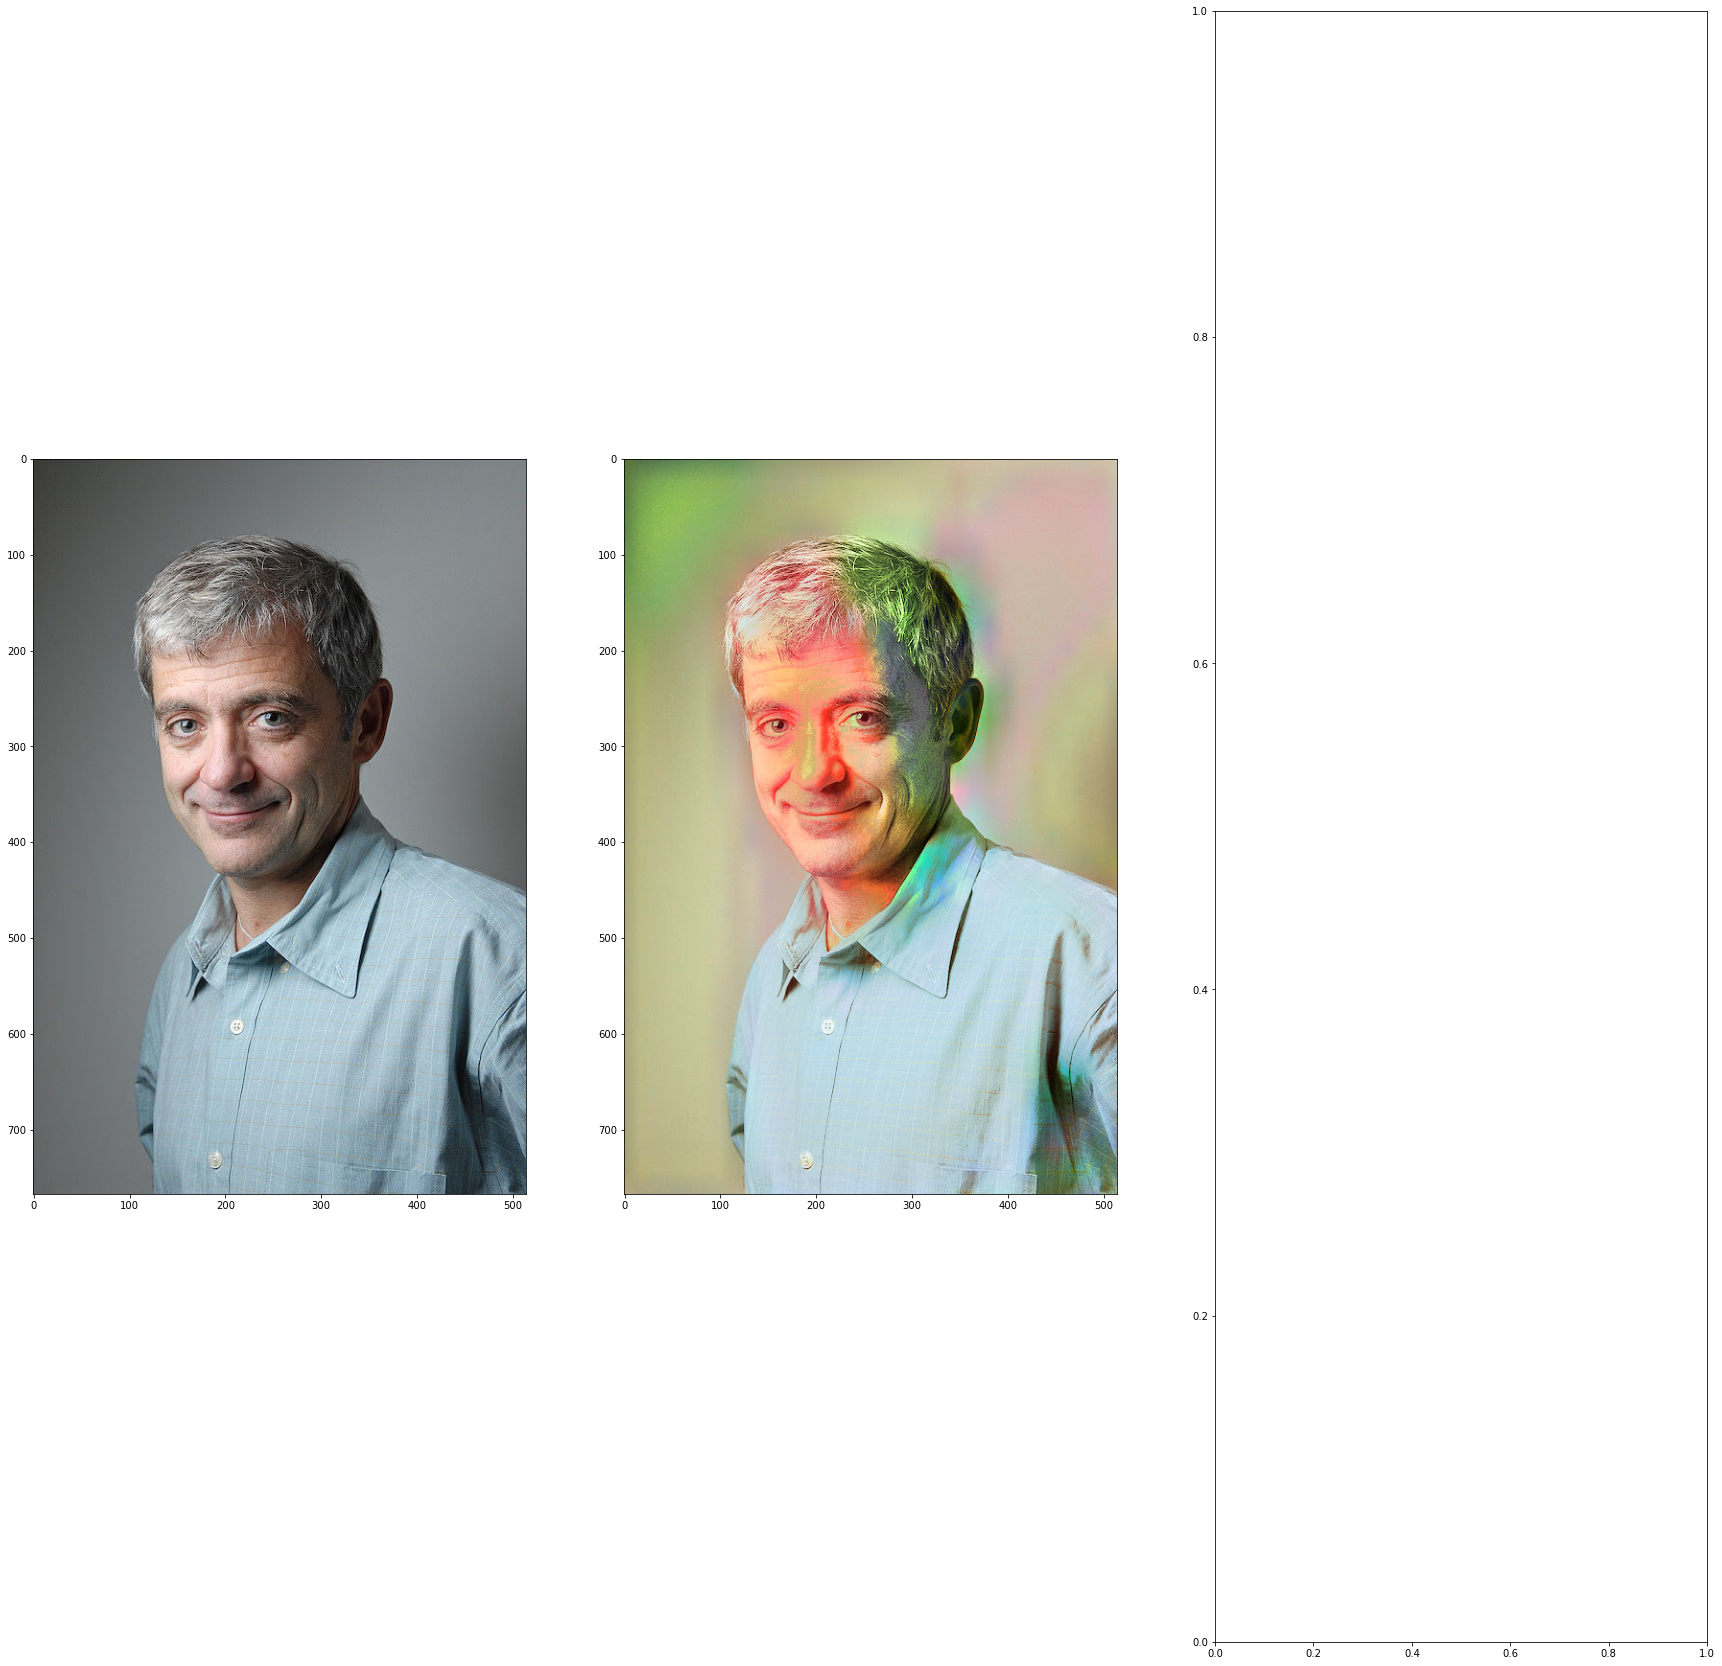

In [61]:
f, axs = plt.subplots(pred.shape[0],3,figsize=(30,30))
for ii in range(pred.shape[0]):
    
    plt.subplot(pred.shape[0],3,3*ii+1)
    plt.imshow(input_image_full[ii].permute(1, 2, 0))
    
    plt.subplot(pred.shape[0],3,3*ii+2)
    plt.imshow(pred[ii].detach().permute(1, 2, 0))
    
    plt.subplot(pred.shape[0],3,3*ii+3)
    plt.imshow(output_image_full[ii].detach().permute(1, 2, 0))
    
    

# Model Paramters

In [65]:
total_params = sum(p.numel() for p in hdrnet.parameters())
total_params

509841

NameError: name 'py' is not defined